# Data analysis

In [1]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


import re

# data visualization
from tabulate import tabulate
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

time series：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

daily：

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

geting daily reports
finish
getiing data
finsh
getting data from shanghai......
finish


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

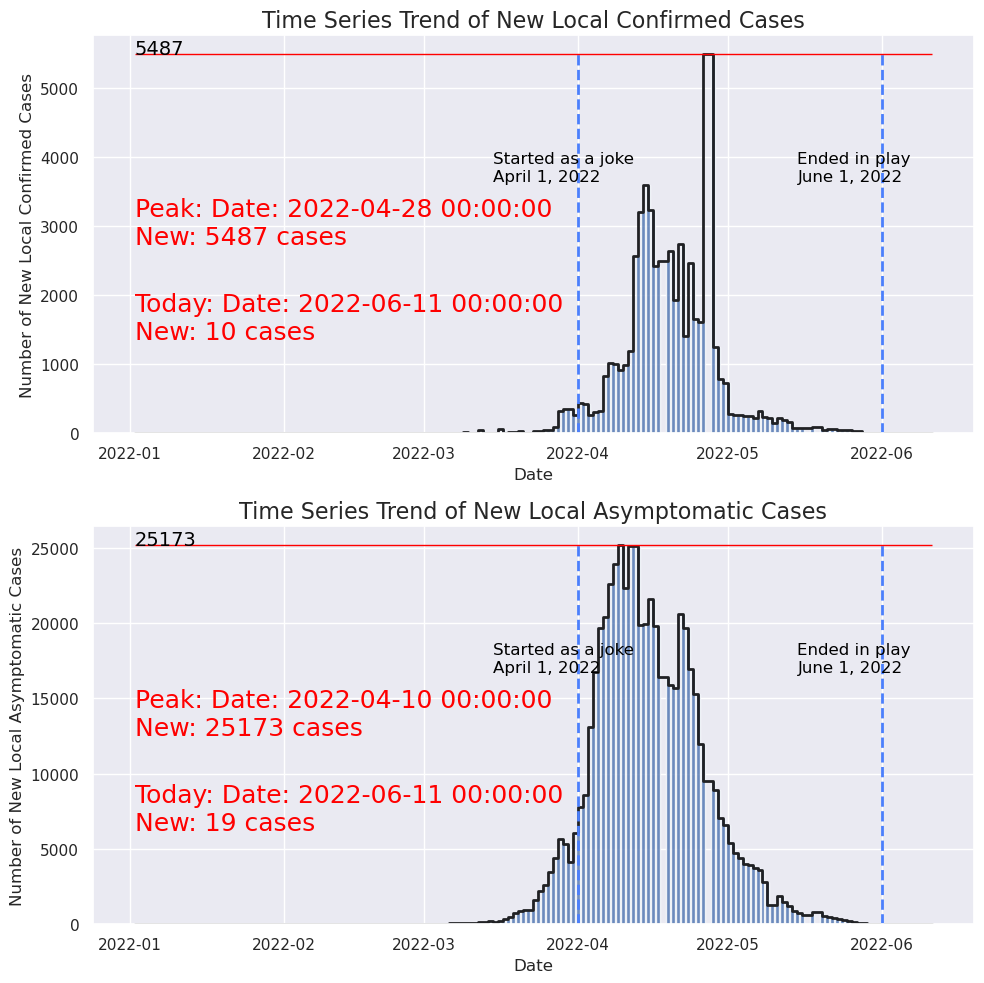

In [2]:
from get_covid_data.getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(plot=True)  

In [5]:
from get_covid_data.data_processing import ts_process_CHINA,ts_process_US,daily_process

In [6]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [7]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [8]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/sep.gif?raw=true width='800' />
</div>

### data quality control

Since clip=False has been set, it means we are considering the scenario of negative growth. Let's see if there has been any negative growth!

In [9]:
neg_incre_date_CHINA = []
neg_incre_province_CHINA = []
neg_incre_number_CHINA = []
for r,c in sorted(zip(np.where(ts_confirmed_CHINA_incre<0)[0],np.where(ts_confirmed_CHINA_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_CHINA.append(str(ts_confirmed_CHINA_incre.index[r]))
    neg_incre_province_CHINA.append(ts_confirmed_CHINA_incre.columns[c])
    neg_incre_number_CHINA.append(ts_confirmed_CHINA_incre.iloc[r,c])

In [10]:
print(tabulate(sorted(zip(neg_incre_date_CHINA,
                   neg_incre_province_CHINA,
                   neg_incre_number_CHINA),key = lambda x: abs(x[2]),reverse = True),
              headers = ['negative growth','places','numbers'],tablefmt = 'pretty'))

+---------------------+--------------+---------+
|   negative growth   |    places    | numbers |
+---------------------+--------------+---------+
| 2022-04-20 00:00:00 |   Shanghai   |  -589   |
| 2023-01-09 00:00:00 |    Macau     |  -265   |
| 2023-01-08 00:00:00 |   Liaoning   |  -244   |
| 2022-12-17 00:00:00 |    Fujian    |   -73   |
| 2022-12-17 00:00:00 |   Jiangsu    |   -27   |
| 2021-10-09 00:00:00 |  Hong Kong   |   -23   |
| 2022-04-15 00:00:00 |    Yunnan    |   -12   |
| 2022-12-17 00:00:00 |    Tibet     |   -7    |
| 2020-06-03 00:00:00 |   Jiangxi    |   -5    |
| 2021-10-14 00:00:00 | Heilongjiang |   -4    |
| 2022-12-17 00:00:00 |    Jilin     |   -1    |
| 2022-12-17 00:00:00 |    Hubei     |   -1    |
| 2022-02-09 00:00:00 |   Liaoning   |   -1    |
| 2021-10-14 00:00:00 |    Hebei     |   -1    |
| 2021-09-03 00:00:00 |  Hong Kong   |   -1    |
| 2021-06-28 00:00:00 |   Beijing    |   -1    |
| 2020-10-25 00:00:00 |   Shaanxi    |   -1    |
| 2020-03-18 00:00:0

In [11]:
neg_incre_date_US = []
neg_incre_province_US = []
neg_incre_number_US = []
for r,c in sorted(zip(np.where(ts_confirmed_US_incre<0)[0],np.where(ts_confirmed_US_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_US.append(str(ts_confirmed_US_incre.index[r]))
    neg_incre_province_US.append(ts_confirmed_US_incre.columns[c])
    neg_incre_number_US.append(ts_confirmed_US_incre.iloc[r,c])
    
    
print(tabulate(sorted(zip(neg_incre_date_US,
                   neg_incre_province_US,
                   neg_incre_number_US),key = lambda x: abs(x[2]),reverse = True),
              headers = ['negative growth','places','numbers'],tablefmt = 'pretty'))

+---------------------+----------------------+---------+
|   negative growth   |        places        | numbers |
+---------------------+----------------------+---------+
| 2022-08-17 00:00:00 |       Florida        | -27000  |
| 2021-04-26 00:00:00 |      New Jersey      |  -9005  |
| 2022-01-26 00:00:00 |       Alabama        |  -8780  |
| 2022-10-26 00:00:00 |       Nebraska       |  -8099  |
| 2021-04-17 00:00:00 |       Missouri       |  -7698  |
| 2023-02-20 00:00:00 |       Missouri       |  -6071  |
| 2023-03-05 00:00:00 |      Tennessee       |  -5128  |
| 2021-03-11 00:00:00 |       Missouri       |  -4354  |
| 2022-02-08 00:00:00 |     Pennsylvania     |  -4116  |
| 2021-06-29 00:00:00 |      California      |  -3940  |
| 2022-05-11 00:00:00 |       Nebraska       |  -3764  |
| 2023-01-17 00:00:00 |       Colorado       |  -3133  |
| 2022-05-05 00:00:00 |    South Carolina    |  -3073  |
| 2022-08-30 00:00:00 |        Idaho         |  -2439  |
| 2022-05-04 00:00:00 |      Wa

## get the negative death number

In [13]:
def negincre_report(ts_data, sort_by = 0):
    """
    ts_data: time seris data
    sort_by: 0 ==> date
             1 ==> place 
             2 ==> number
    """
    neg_incre_date = []
    neg_incre_province = []
    neg_incre_number = []
    for r,c in sorted(zip(np.where(ts_data<0)[0],np.where(ts_data<0)[1]),key = lambda x: x[0],reverse=True):
        neg_incre_date.append(str(ts_data.index[r]))
        neg_incre_province.append(ts_data.columns[c])
        neg_incre_number.append(ts_data.iloc[r,c])

    recent_date = ts_data.index[np.where(ts_data.sum(axis=1)<0)].format()
    if len(recent_date) != 0:
        recent_date = recent_date[0]
    else:
        recent_date = 'None'
        
    print('*'*20 +  'INFO' +  '*'*20)
    print(f"Date of negative growth{recent_date}")
    
    print('*'*20 +  'REPORT' +  '*'*20)
    print(tabulate(sorted(zip(neg_incre_date,
                       neg_incre_province,
                       neg_incre_number),key = lambda x: abs(x[sort_by]) if sort_by == 2 else x[sort_by],reverse = True),
                  headers = ['negative growth','places','numbers'],tablefmt = 'pretty'))



In [14]:
negincre_report(ts_confirmed_CHINA_incre,sort_by=2)


********************INFO********************
Date of negative growth2020-06-03
********************REPORT********************
+---------------------+--------------+---------+
|   negative growth   |    places    | numbers |
+---------------------+--------------+---------+
| 2022-04-20 00:00:00 |   Shanghai   |  -589   |
| 2023-01-09 00:00:00 |    Macau     |  -265   |
| 2023-01-08 00:00:00 |   Liaoning   |  -244   |
| 2022-12-17 00:00:00 |    Fujian    |   -73   |
| 2022-12-17 00:00:00 |   Jiangsu    |   -27   |
| 2021-10-09 00:00:00 |  Hong Kong   |   -23   |
| 2022-04-15 00:00:00 |    Yunnan    |   -12   |
| 2022-12-17 00:00:00 |    Tibet     |   -7    |
| 2020-06-03 00:00:00 |   Jiangxi    |   -5    |
| 2021-10-14 00:00:00 | Heilongjiang |   -4    |
| 2022-12-17 00:00:00 |    Jilin     |   -1    |
| 2022-12-17 00:00:00 |    Hubei     |   -1    |
| 2022-02-09 00:00:00 |   Liaoning   |   -1    |
| 2021-10-14 00:00:00 |    Hebei     |   -1    |
| 2021-09-03 00:00:00 |  Hong Kong   |   

In [15]:
def dataQC(data):
    # basic info
    print(f"Total rows: {Fore.RED}{data.shape[0]}{Style.RESET_ALL}")
    print(f"Total columns: {Fore.RED}{data.shape[1]}{Style.RESET_ALL}")
    print(f"Total elements: {data.size}")
    print('-'*50 + f"{Fore.RED}INFO{Style.RESET_ALL}" + '-'*50)
    print('[Basic Information]')
    data.info()


In [16]:
dataQC(latest_data_CHINA)

Total rows: 33
Total columns: 6
Total elements: 198
--------------------------------------------------INFO--------------------------------------------------
[Basic Information]
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Anhui to Zhejiang
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province_State       33 non-null     object 
 1   Last_Update          33 non-null     object 
 2   Confirmed            33 non-null     int64  
 3   Deaths               33 non-null     int64  
 4   Incident_Rate        33 non-null     float64
 5   Case_Fatality_Ratio  33 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ KB


### Data visualization


- [Matplotlib](https://gitee.com/gzjzg/WhaleDataScienceProject/tree/master/porto-seguro-safe-driver-prediction/Phase2/Matplotlib)
- [Seaborn](https://gitee.com/gzjzg/WhaleDataScienceProject/tree/master/porto-seguro-safe-driver-prediction/Phase3/Seaborn)
- [Plotly](https://zg104.github.io/Plotly)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

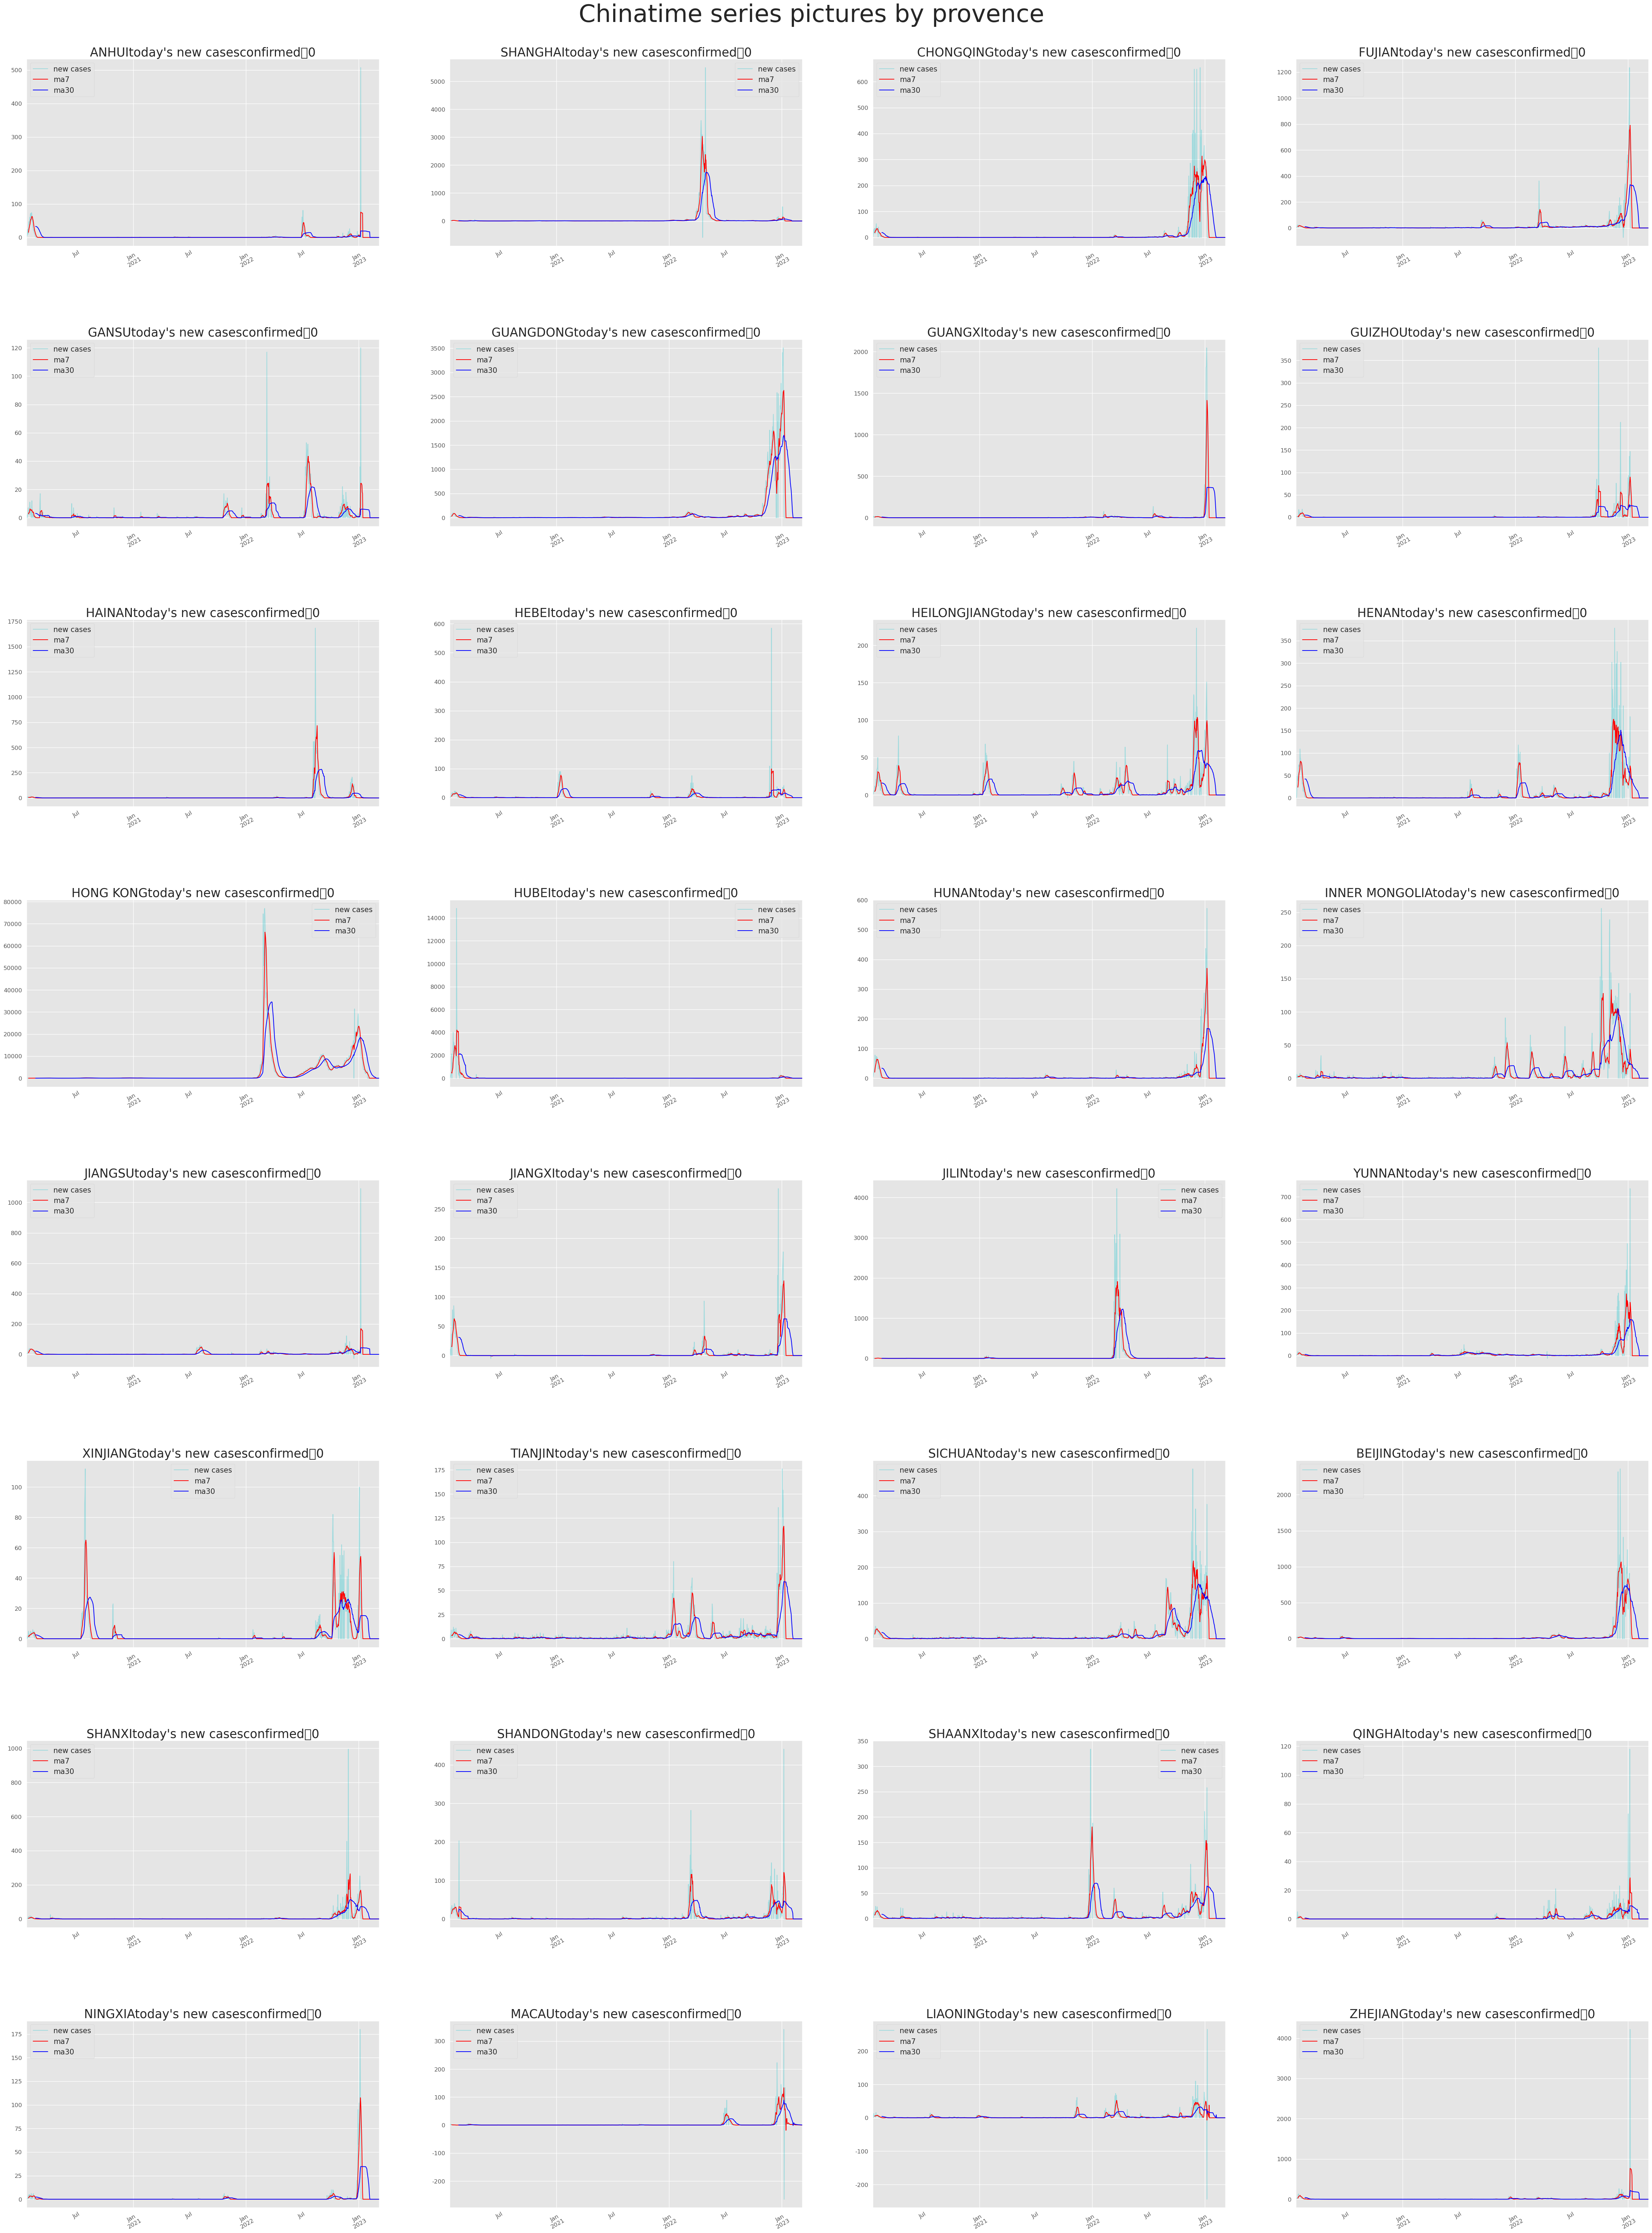

In [17]:
country = 'China'
ma = [7,30]
method = 'new cases'
kind = 'confirmed'



data_copy = ts_confirmed_CHINA_incre.copy()
data_copy = data_copy.drop(['Tibet'],axis=1).sort_values(axis=1, by =data_copy.index[-1],ascending=False)
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15*4, 10*8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(f"{country}time series pictures by provence", fontsize=50, y = 0.9)
for province,ax in zip(data_copy.columns, axs.ravel()):
    data_copy[province].plot(ax=ax,rot = 30, fontsize = 12,alpha = .3, label = method, color = '#06c3cc')
    data_copy[province].rolling(ma[0]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[0]}',color = 'red')
    data_copy[province].rolling(ma[1]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[1]}',color = 'blue')
    ax.set_title(f"{province.upper()}today's new cases{kind}：{int(data_copy[province].tail(1))}",fontsize = 25)
    ax.legend(fontsize = 15)
    ax.set_xlabel("")
plt.show()

<div class="alert alert-block alert-success"><b>Step 5 Plot US TS Trends by State</b>
    
</div>

In [18]:
data_copy1 = ts_confirmed_US_incre

specify = 'New York'
idx = data_copy1.index
ser = data_copy1[specify]
layout_title = specify.upper()
kind = 'new cases'
method = 'New'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method} {kind}',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}-day moving average',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}-day moving average',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace, trace1, trace2]

'''Initiate plotting'''

x_axis_config = {'title': 'Date'}
y_axis_config = {'title': f'Number of {kind} ({method.upper()})'}
# Return the specified image layout and configuration object
my_layout = Layout(title=f"【{layout_title}】Time Series Line Chart of Recent {kind} ({method.upper()})",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# Generate the chart
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')


<div class="alert alert-block alert-danger">
<b>注意：</b>

以上的三个获取数据的函数，我写在一个python模块中，叫做`getdata`。
    
大家在直接调用`getdata.py`文件即可！
    
</div>

In [20]:
data_copy1 = ts_confirmed_CHINA_incre

specify = 'Shanghai'
idx = data_copy1.index
ser = data_copy1[specify]
layout_title = specify.upper()
kind = 'confirmed cases'
method = 'new cases'
ma = [7,30]
trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method} {kind}',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}-day moving average',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}-day moving average',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace, trace1, trace2]

'''Initiate plotting'''

x_axis_config = {'title': 'Date'}
y_axis_config = {'title': f'Number of {kind} ({method.upper()})'}
# Return the specified image layout and configuration object
my_layout = Layout(title=f"【{layout_title}】Time Series Line Chart of Recent {kind} ({method.upper()})",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# Generate the chart
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')


### result analysis



The observation suggests a significant surge in COVID-19 cases around February and March of 2022. This phenomenon could be attributed to deviations in public health policy and management strategies, similar to those observed in the United Kingdom, leading to a critical escalation in the case numbers. The situation underscores the complexities and challenges in pandemic response, particularly in regions with dense populations and interconnected urban environments.

In light of this, it is prudent to exclude the data pertaining to Hong Kong to analyze the trend within mainland China more accurately. By doing so, we can attain a clearer understanding of the pandemic's trajectory and the efficacy of implemented control measures in the mainland, thus enabling a more focused analysis of the regional responses and outcomes.

In [19]:
data_copy1 = ts_confirmed_CHINA_incre

specify = 'Mainland China'
idx = data_copy1.index
# Excludes Hong Kong data and sums up the rest for each date
ser = data_copy1.drop('Hong Kong', axis=1).sum(axis=1)
layout_title = specify.upper()
kind = 'Confirmed'
method = 'New'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method} {kind} Count',
            opacity = .8,
            line=dict(color="#08a8c4", width = .4),
            marker = dict(color = '#5857e1', size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}-day Moving Average',
    opacity = .6,
    line=dict(color="#ee5090", width = 1.4),
    marker = dict(color = '#dd001b', size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}-day Moving Average',
    opacity = .8,
    line=dict(color="#006eff", width = 2.4),
    marker = dict(color = '#412b63', size = 3.2)
)

plotdata = [trace, trace1, trace2]

'''Initiate plotting'''

x_axis_config = {'title': 'Date'}
y_axis_config = {'title': f'{kind} Count ({method.upper()})'}
# Return the specified image layout and configuration object
my_layout = Layout(title=f"【{layout_title}】Recent {kind} Count Time Series Line Chart ({method.upper()})",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# Generate the chart
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS', image_height=500, image_width=1000, image = 'png')


In [20]:
data_copy1 = ts_confirmed_US_incre

specify = 'USA'
idx = data_copy1.index
# Summing up the data across all columns for each date to get total new cases
ser = data_copy1.sum(axis=1)
layout_title = specify.upper()
kind = 'Confirmed'
method = 'New'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method} {kind} Count',
            opacity = .8,
            line=dict(color="#08a8c4", width = .4),
            marker = dict(color = '#5857e1', size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}-day Moving Average',
    opacity = .6,
    line=dict(color="#ee5090", width = 1.4),
    marker = dict(color = '#dd001b', size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}-day Moving Average',
    opacity = .8,
    line=dict(color="#006eff", width = 2.4),
    marker = dict(color = '#412b63', size = 3.2)
)

plotdata = [trace, trace1, trace2]

'''Initiate plotting'''

x_axis_config = {'title': 'Date'}
y_axis_config = {'title': f'{kind} Count ({method.upper()})'}
# Return the specified image layout and configuration object
my_layout = Layout(title=f"【{layout_title}】Recent {kind} Count Time Series Line Chart ({method.upper()})",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# Generate the chart
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS', image_height=500, image_width=1000, image = 'png')


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

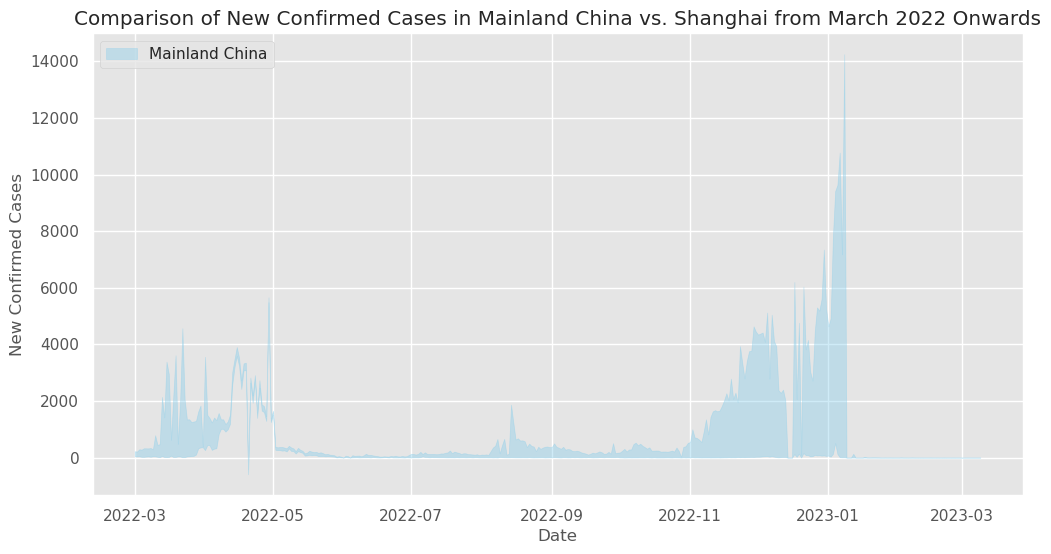

In [21]:
data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index >= '2022-03-01']

specify = 'Mainland China vs. Shanghai'
idx = data_copy1.index
# Excludes Hong Kong data and sums up the rest for each date to get total new cases in Mainland China
ser = data_copy1.drop('Hong Kong', axis=1).sum(axis=1)
layout_title = specify.upper()
kind = 'Confirmed'
method = 'New'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'New {kind} Count',
            opacity = .8,
            line=dict(color="#08a8c4", width = .4),
            marker = dict(color = '#5857e1', size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}-day Moving Average',
    opacity = .6,
    line=dict(color="#ee5090", width = 1.4),
    marker = dict(color = '#dd001b', size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}-day Moving Average',
    opacity = .8,
    line=dict(color="#006eff", width = 2.4),
    marker = dict(color = '#412b63', size = 3.2)
)

trace3 = go.Scatter(
    x = idx,
    y = data_copy1['Shanghai'],
    mode = 'lines+markers',
    name = 'Shanghai New Cases',
    opacity = .8,
    line=dict(color="#f3832c", width = 1.4),
    marker = dict(color = '#d90013', size = 3.2)
)

plotdata = [trace, trace1, trace2, trace3]

'''Initiate plotting'''

x_axis_config = {'title': 'Date'}
y_axis_config = {'title': f'{kind} Count ({method.upper()})'}
# Return the specified image layout and configuration object
my_layout = Layout(title=f"【{layout_title}】Recent {kind} Count Time Series Line Chart ({method.upper()}) from March 2022 onwards",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# Generate the chart
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS', image_height=500, image_width=1000, image='png')


data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index >= '2022-03-01']
plt.figure(figsize=[12,6])
plt.fill_between(x=idx, 
                 y1=data_copy1.drop('Hong Kong', axis=1).sum(axis=1),
                 y2=data_copy1['Shanghai'], color='skyblue', alpha=0.4)
plt.title('Comparison of New Confirmed Cases in Mainland China vs. Shanghai from March 2022 Onwards')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.legend(['Mainland China', 'Shanghai'], loc='upper left')
plt.show()
